# Linear regression

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/DA_Project/Project/Minimum/5erforderlich


## Import the bmw data

In [2]:
# Read data to pandas data frame
df_orig = pd.read_csv('bmw_data_prepared.csv', 
                      sep=',', 
                      encoding='utf-8')

# Copy of data with selected colums
columns = [ 'web-scraper-order', 
                'model_raw',
                'Location',
                'PLZ',
                'Year',
                'price',
                'km',
                'luxury',
                'competition',
                'xDrive',
                'automat',
                'km_cat',
                'km_per_year',]
df = df_orig[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 300000)]

print(df.shape)
df.head(5)

(872, 19)


,id,web-scraper-start-url,text_raw,price_raw,model_raw,type_year_km_transmission_fuel,Location,PLZ,km_raw,Year,price,km,luxury,competition,xDrive,automat,km_cat,km_per_year,km_per_year_cat
0,1705078003-1,https://www.comparis.ch/carfinder/marktplatz/b...,BMW X3 X3 XDRIVE 20D XLINE STEPTRONICCHF 22'90...,CHF 22'900,X3 xDrive 20d xLine Steptronic,Occasion05.2016119.500 kmAutomatDiesel1227 (GE),GE,1227,119.500,2016,22900,119500.0,0,0,1,1,50-120k,14937.50,medium
1,1705078003-2,https://www.comparis.ch/carfinder/marktplatz/b...,BMW 540 540ICHF 13'750AB CHF 220 / MONAT5 / 6O...,CHF 13'750,540i,Occasion05.2006124.900 kmAutomatBenzin4461 (BL),BL,4461,124.900,2006,13750,124900.0,0,0,0,1,120k+,6938.89,low
2,1705078003-3,https://www.comparis.ch/carfinder/marktplatz/b...,BMW 225 ACTIVE TOURER 225XE IPERFORMANCE ACTIV...,CHF 28'800,225xe iPerformance Active Tourer Steptronic M ...,Occasion09.201928.950 kmAutomatBenzin/Elektro4...,BL,4460,28.950,2019,28800,28950.0,0,0,0,1,0-50k,5790.00,low
3,1705078003-4,https://www.comparis.ch/carfinder/marktplatz/b...,BMW 316 316I COMPACTCHF 1'100OCCASION04.200024...,CHF 1'100,316i Compact,Occasion04.2000248.013 kmAutomatBenzin6300 (ZG),ZG,6300,248.013,2000,1100,248013.0,0,0,0,1,120k+,10333.88,medium
4,1705078003-5,https://www.comparis.ch/carfinder/marktplatz/b...,BMW 530 530XI STEPTRONICCHF 10'900AB CHF 175 /...,CHF 10'900,530xi Steptronic,Occasion06.2008160.000 kmAutomatBenzin6010 (LU),LU,6010,160.000,2008,10900,160000.0,0,0,0,1,120k+,10000.00,low


## Simple linear regression (only one explanatory variable in the model)
For details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [3]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['km'], 
                                                    df['price'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
618    130000.0
445    310043.0
868    182000.0
348     16200.0
363     81000.0
Name: km, dtype: float64 

y_train:
618    18900
445     4900
868    12900
348    26900
363    17900
Name: price, dtype: int64


### Fit the simple linear regression model

In [4]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            60724.02
Slope of regression line (beta):          -0.246
p-value:                                  0.0000
R-squared (coefficient of determination): 0.4255


### Plot regression line

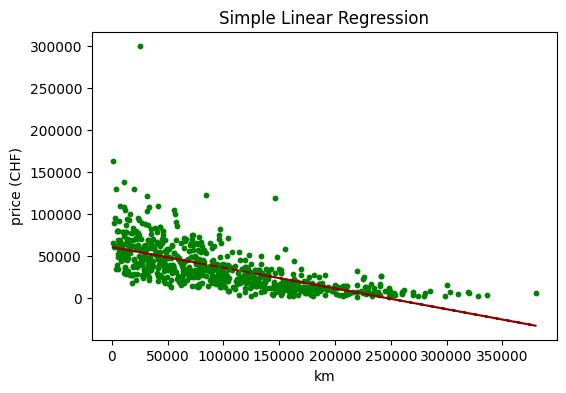

In [5]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('km')
plt.ylabel('price (CHF)')

plt.show()

### Check model residuals (residuals = observed prices minus predicted prices)

In [6]:
# Calculate model residuals for train data
residuals = y_train - mymodel

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 28714.73
1st Observed price in dataset: 22900.00
1st Residual price in dataset: -5814.73


### Plot histogram of residuals

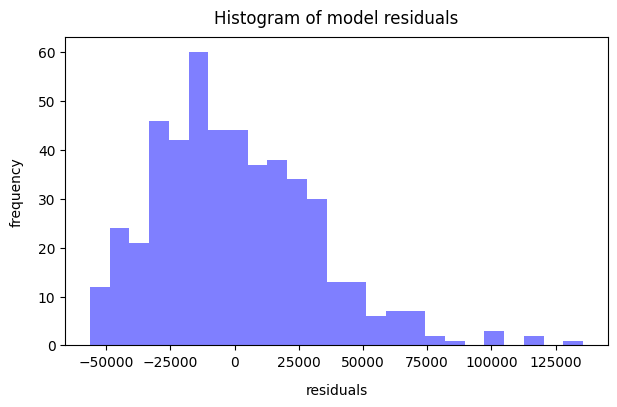

In [7]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Show plot
plt.show()

### Compare the observed prices with the predicted prices

In [8]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted.iloc[i]:.1f}')

Observed price: 26900.0, Predicted price: 14433.7
Observed price: 36400.0, Predicted price: 38686.9
Observed price: 9900.0, Predicted price: 27729.8
Observed price: 74900.0, Predicted price: 47437.2
Observed price: 89900.0, Predicted price: 53263.4
Observed price: 56800.0, Predicted price: 41641.6
Observed price: 69900.0, Predicted price: 41395.3
Observed price: 28900.0, Predicted price: 44571.6
Observed price: 54900.0, Predicted price: 47920.3
Observed price: 28900.0, Predicted price: 48191.1


## Multiple linear regression (more than one explanatory variable in the model)
For details see: https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [9]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['km',
                                                            'Year']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
           km  Year
618  130000.0  2016
445  310043.0  2006
868  182000.0  2012
348   16200.0  2020
363   81000.0  2014 

y2_train:
618    18900
445     4900
868    12900
348    26900
363    17900
Name: price, dtype: int64


### Fit the multiple regression model

In [10]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     281.4
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           3.13e-90
Time:                        11:31:19   Log-Likelihood:                -7896.1
No. Observations:                 697   AIC:                         1.580e+04
Df Residuals:                     694   BIC:                         1.581e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.081e+06   4.04e+05     -5.150      0.0

### Plot histogram of residuals

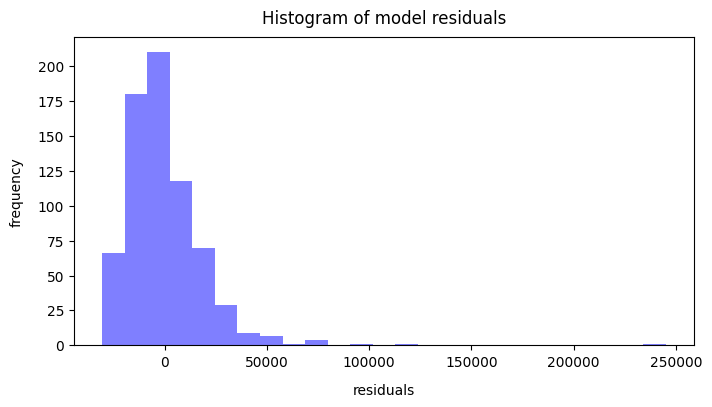

In [11]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

### Compare the observed prices with the predicted prices

In [12]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

Observed price: 26900.0, Predicted price: 18240.6
Observed price: 36400.0, Predicted price: 40796.2
Observed price: 9900.0, Predicted price: 27223.5
Observed price: 74900.0, Predicted price: 50583.3
Observed price: 89900.0, Predicted price: 54983.7
Observed price: 56800.0, Predicted price: 38790.2
Observed price: 69900.0, Predicted price: 38604.2
Observed price: 28900.0, Predicted price: 45240.8
Observed price: 54900.0, Predicted price: 47770.0
Observed price: 28900.0, Predicted price: 47974.6


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [13]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1018-azure
Datetime: 2024-01-13 11:31:19
Python Version: 3.10.13
-----------------------------------
